In [1]:
#Installing Modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import collections
import re
import math
import string
from tqdm import tqdm, trange
from statistics import mean
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag, word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.utils.extmath import randomized_svd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn import svm
from sklearn.decomposition import NMF,TruncatedSVD
import pickle


# Question 1

In [2]:
#load in dataset
df = pd.read_csv('C:/Users/Sunny/Downloads/Project1-Classification.csv')
df.head(10)

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports
5,'Referee Martin Pronovost wears a Hockey Canad...,'Hockey Canada reached a settlement in May wit...,"['situation', 'culture', 'needs', 'sexual', 'i...",NaN,['Sara Civian'],https://bleacherreport.com/articles/10052673-m...,hockey,sports
6,'Sonny Milano tied it with less than three min...,'Flyers Capitals Hockey Washington Capitals le...,"['ovechkins', 'ot', 'goal', 'game', 'philadelp...",2022-11-24 05:26:00+00:00,['News Traffic Weather'],https://wtop.com/washington-capitals/2022/11/a...,hockey,sports
7,'GRAND FORKS — A hockey stick in pieces used t...,'GRAND FORKS — A hockey stick in pieces used t...,"['stick', 'repairs', 'process', 'dakota', 'nor...",2022-11-29 13:33:00,"['A South Dakota Native', 'Hunter Joined Forum...",https://www.inforum.com/business/a-broken-hock...,hockey,sports
8,'Alex Ovechkin tied Gordie Howe for the most g...,'Capitals Red Wings Hockey Detroit Red Wings c...,"['ovechkin', 'wings', 'red', 'howes', 'osorio'...",2022-11-04 02:51:00+00:00,['News Traffic Weather'],https://wtop.com/washington-capitals/2022/11/o...,hockey,sports
9,'Hockey Canada’s members have elected a new bo...,'Hockey Canada’s members have elected a new bo...,"['elect', 'sexual', 'organization', 'allegatio...",2022-12-17 00:00:00,['The Athletic Staff'],https://theathletic.com/4011708/2022/12/17/hoc...,hockey,sports


In [3]:
#How many rows (samples) and columns (features) are present in the dataset?
df.shape

(3150, 8)

Text(0.5, 1.0, 'The total number of alpha-numeric characters per data point (row) in the feature full_text')

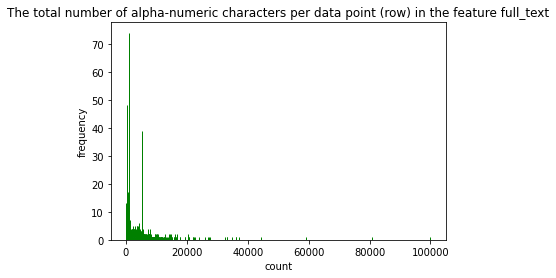

In [4]:
'''Histograms: Plot 3 histograms on : (a) The total number of alpha-numeric characters per
data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis;
(b) The column leaf label – class on the x-axis; (c) The column root label – class on the
x-axis'''
#(a)
dataset=df['full_text'].str.split() #split first
dataset=df['full_text'].str.len() #find the length
dataset.head(10)#summary of the length
#plt.hist(dataset,bins=len(set(dataset)))


total = dataset.to_numpy()
amount, counts = np.unique(total, return_counts=True)
plt.bar(amount,counts,edgecolor = 'green')
plt.xlabel('count')
plt.ylabel('frequency')
plt.title('The total number of alpha-numeric characters per data point (row) in the feature full_text')


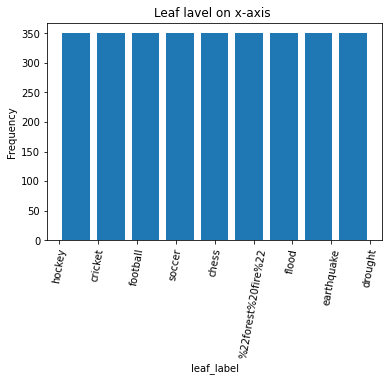

In [5]:
#(b)
leaf = df["leaf_label"].value_counts()
# print(leaf)
plt.hist(df["leaf_label"], bins = len(leaf), rwidth = 0.8)
plt.title("Leaf lavel on x-axis ")
plt.xlabel("leaf_label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)
plt.show()

sports     1750
climate    1400
Name: root_label, dtype: int64


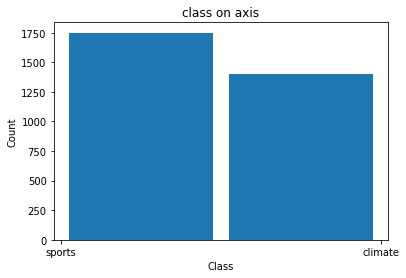

In [6]:
#(c)
label = df["root_label"].value_counts()
plt.hist(df["root_label"], bins = len(label),rwidth = 0.9)
plt.title("class on axis")
plt.xlabel("Class")
plt.ylabel("Count")
print(label)

In [7]:
########## Question 2
import numpy as np
import random
np.random.seed(42)
random.seed(42)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)
print("There are " + str(train.shape[0]) + " training samples and " + str(test.shape[0]) + " test samples.")

There are 2520 training samples and 630 test samples.


In [10]:
########## Question 3
#Clean up the data, code from discussion session
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter
#get ride of the number
def remove_numbers(text):
    text_nonum = re.sub(r'\b[0-9]+\b\s*', '', text)
    clean_text = []
    for word in word_tokenize(text):
        if (not any(char.isdigit() for char in word)):
            clean_text.append(word)
    return ' '.join(clean_text)
#code from discussion
def penn2morphy(penntag):  
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
#data clearning
def clean_data(text):  
    text = clean(text)
    text = remove_numbers(text)
    return text
#stemming
def stem(text):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in word_tokenize(text):
        if (not any(char in word for char in string.punctuation)):
            stemmed_words.append(stemmer.stem(word))
    return ' '.join(stemmed_words)

# try lemmatization
def lemmatization(text):
    lemmatization = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in string.punctuation)):
            lemmatized_words.append(lemma.lower())
    return ' '.join(lemmatized_words)


def preprocessing(text):
    text = clean_data(text)
    text = remove_numbers(text)
    text = lemmatization(text)
    return text


In [11]:
import pickle
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tqdm.pandas() # require pandas == 1.3.5 and tqdm > 4.50.1
train['clean_data'] = train['full_text'].progress_apply(lambda x:preprocessing(x))
test['clean_data'] = test['full_text'].progress_apply(lambda x:preprocessing(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
100%|████████████████████████████████████████████████████████████████████████████████| 630/630 [00:20<00:00, 31.38it/s]


In [12]:
train.head()

,full_text,root_label,clean_data
2310,"'As of Sunday night, a lopsided area of low pr...",climate,of sunday night a lopsided area of low pressur...
2189,'The U.N. children’s agency says some 2 millio...,climate,childrens agency say some million child in are...
2304,'Wicked winds and heavy rains battered the sta...,climate,wind and heavy rain batter the state of maine ...
2988,'I live in a community with a homeowners assoc...,climate,i live in a community with a homeowner associa...
221,'The Special Olympics team took home the hard ...,sports,special olympics team take home the hard fough...


In [13]:
# count_vect = CountVectorizer()
#count_vect = CountVectorizer(stop_words='english')
count_vect = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)
#get the train matrix
train_count_vect = count_vect.fit_transform(train['clean_data'])
train_df = tfidf_tranformer.fit_transform(train_count_vect).toarray()
#get the test matrix
test_count_vect = count_vect.transform(test['clean_data'])
test_df = tfidf_tranformer.transform(test_count_vectorizer).toarray()
#print out the shape
print('train matrix shape':train_df.shape)
print('test matrix shape:', test_df.shape)

train matrix shape: (2520, 14076)
test matrix shape: (630, 14076)


In [15]:
#in this part we interested to see how columns changed
def affect_min_df(min_df, train, test):
    count_vectorizer = CountVectorizer(stop_words="english", min_df=min_df)
    tfidf_tranformer = TfidfTransformer(use_idf=True)    
    train_count_vectorizer = count_vectorizer.fit_transform(train['clean_data'])
    train_df = tfidf_tranformer.fit_transform(train_count_vectorizer).toarray()
    
    test_count_vectorizer = count_vectorizer.transform(test['clean_data'])
    test_df = tfidf_tranformer.transform(test_count_vectorizer).toarray()
    
    print(f"when min_df = {min_df}")
    print('train matrix shape:', train_df.shape)
    print('test matrix shape:', test_df.shape)
    print()
    return train, test

for i in range(1,5):
    affect_min_df(i, train, test)

when min_df = 1
train matrix shape: (2520, 34769)
test matrix shape: (630, 34769)

when min_df = 2
train matrix shape: (2520, 19362)
test matrix shape: (630, 19362)

when min_df = 3
train matrix shape: (2520, 14076)
test matrix shape: (630, 14076)

when min_df = 4
train matrix shape: (2520, 11330)
test matrix shape: (630, 11330)



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:33<00:00,  4.22s/it]

[1, 10, 50, 100, 200, 500, 1000, 2000] [0.00656949709556808, 0.15371132292339545, 0.31008091165970547, 0.39812708888845594, 0.5088358207204101, 0.7023408218419535, 0.8761614715567544, 0.999989878709443]


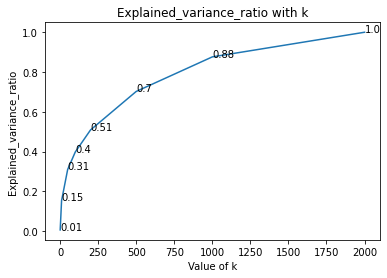

In [24]:
################Q4
#get the list of k
k = [1, 10, 50, 100, 200, 500, 1000, 2000]
var_ratio = []
def k_value(k, svd):#define k and svd
    variance = svd.var_ratio_
    eigenvalues = np.cumsum(variance)
for i in trange(len(k)):
    svd = TruncatedSVD(n_components=k[i], random_state=42)
    svd.fit(train_df)
    plot_figure_for_each_k(k[i], svd)
    var_ratio.append(sum(svd.var_ratio_))
#get the plot ready
plt.title('Explained_variance_ratio with verious k')
plt.xlabel("Value of k")
plt.ylabel("Explained_variance_ratio")  
plt.plot(k, var_ratio, label="points")
#plot the Variance ratio of K and print out the value
for sk, y in zip(k, var_ratio):
      plt.text(sk, y, str(round(y, 2)))
print(k,var_ratio)

In [32]:
#########Question 4 part b
#Get MSE Error of LSI
u,sig,vtran = randomized_svd(train_df,random_state=42,n_components=50) 
X = np.dot(np.dot(u,np.diag(sig)),vtran) #formula
LSI_MSE = np.sqrt(np.sum(np.square(X - train_df)))
#Get MSE Error of NMF
nmf = NMF(n_components=50, init='random', random_state=42)
nmf_train = nmf.fit_transform(train_df)
WTH = np.dot(nmf_train, nmf.components_)
NMF_MSE = np.sqrt(np.sum(np.square(train_df-WTH)))
print("MSE Error for LSI is " + str(LSI_MSE))
print("MSE Error for NMF is " + str(NMF_MSE))

MSE Error for LSI is 41.02637078289105
MSE Error for NMF is 41.37286730025996


In [46]:
#########Question 5